<h1>CNN Using Raw Spectra as Inputs</h1>

<p>This notebook is used to train and explore a CNN model that classifies minerals by taking in raw spectra</p>

In [1]:
import numpy as np
import pandas as pd
import cnnmodel_raw as cnn_raw
from tensorflow.keras.models import Model


<h1>Use this space below for fiddling with model training</h1>

<p>If you need to retrain the model, be sure to restart the runtime</p>

<h3>Define Hyperparameters below</h3>

In [2]:
learning_rate=0.0001
batch_size=100
drop_rate=0.7
epochs=50

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]

In [3]:
#this string is prepended to all output files for unique identification
id_value='scrap_test'

#training data file path
fin_path=r'Data/Raw Data/Single/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
#note if fast is true, model will train in <5 min while false may be >30 min
fast=True

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0.5


In [4]:
'''train the model'''
cnn_model,train_history,X_val,y_val=cnn_raw.raw_cnn_model(fin_path,mout_path,dev_size,r_state,hyperparameters,
                          fast,id_value,threshold=threshold)

Master data set shape is (71674, 951) 

 Master data set is
                               150      151      152      153      154  \
albite_train_015s_5250-0  1843.10  1848.63  1855.44  1872.17  1893.32   
albite_train_015s_5250-1  1835.52  1845.35  1855.77  1869.89  1889.67   
albite_train_015s_5250-2  1802.07  1814.18  1831.13  1853.05  1880.13   
albite_train_015s_5250-3  1808.57  1815.09  1823.15  1839.00  1864.86   
albite_train_015s_5250-4  1800.92  1810.23  1822.96  1839.00  1858.79   
...                           ...      ...      ...      ...      ...   
qtz_train_015s_625-620    2576.47  2568.46  2556.91  2539.18  2439.98   
qtz_train_015s_625-621    2575.20  2541.80  2516.90  2489.10  2427.84   
qtz_train_015s_625-622    2575.00  2558.69  2553.06  2531.36  2460.90   
qtz_train_015s_625-623    2562.41  2541.03  2520.78  2504.17  2451.60   
qtz_train_015s_625-624    2566.18  2529.75  2500.82  2475.56  2412.82   

                              155      156      157      158  

574/574 [==============================] - 110s 192ms/step - loss: 0.1189 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9998
Epoch 9/50
574/574 [==============================] - 110s 192ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9997 - val_loss: 0.0779 - val_sparse_categorical_accuracy: 0.9998
Epoch 10/50
574/574 [==============================] - 111s 193ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9997
Epoch 11/50
574/574 [==============================] - 111s 193ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9999
Epoch 12/50
574/574 [==============================] - 111s 193ms/step - loss: 0.0694 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0468 - val_sparse_categorical_accuracy: 0.9998
Epoch 13/50
574/574 [==============================] - 111s 193ms/step - loss: 0.0609 - 

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=range(0, 16) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15
true_0,1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_1,0,1184,0,0,0,0,0,0,0,0,0,0,0,0,0,0
true_2,0,0,1023,0,0,0,1,0,0,1,0,0,0,0,0,0
true_3,0,0,0,1440,0,0,0,0,0,0,0,0,0,0,0,0
true_4,0,0,0,0,1291,0,0,0,0,0,0,0,0,0,0,0
true_5,0,0,0,0,0,996,0,0,0,0,0,0,0,0,0,0
true_6,0,0,0,0,0,0,1156,0,0,0,0,0,0,0,0,0
true_7,0,0,0,0,0,0,0,1115,0,0,0,0,0,0,0,0
true_8,0,0,0,0,0,0,0,0,1164,0,0,0,0,0,0,0
true_9,0,0,1,0,0,0,0,0,0,1031,0,0,0,0,0,1


# **Test the model**

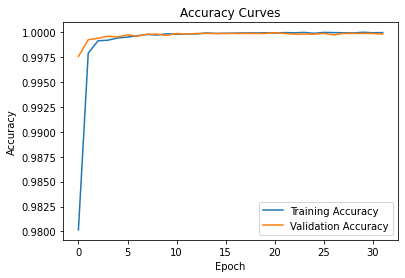

"#test data path - do not include /content/.../ML Spectroscopy/\ntestin_path=r'Data/Raw Data/Labeled Test/'\n\n#build test set, drops samples with Null values\ntest_df=h.dfbuilder(testin_path,synth=False,split_df=False,use_trash=False,raw=False,test=True)\n\n\n#separates features and labels\ny_test=test_df[test_df.columns[-1]]\nX_test=test_df.drop(test_df.columns[-1],axis=1).values\n\n#roc_out=h.roc_all(cnn_model.predict(X_test),y_test)\n\nif not fast:\n  roc_out.to_csv(mout_path+id_value+'roc_data.csv')\n\n#tests model, you can also use model.predict outside of this scope\ncnn.test_cnn_model(cnn_model,X_test,y_test,id_value,threshold=0.0)\n\n#this is that old folder we were talking about where CNN.csv files get saved, i just commented it out and pointed it to the folder with the rest of the outputs\n#saved_data=r'/content/drive/My Drive/ML Spectroscopy/Programs/Data Processing/Saved Lists/'\nsaved_data=r'/content/drive/My Drive/ML Spectroscopy/Model Data/CNN Model/'\npd.DataFrame(data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pprint import pprint
from IPython.display import clear_output
from sklearn.metrics import roc_curve

train_accuracy = train_history.history['sparse_categorical_accuracy']
train_accuracy_df = pd.DataFrame(train_accuracy)
#train_accuracy_df.to_csv(train_accuracy_path, index = False, header = False)

val_accuracy = train_history.history['val_sparse_categorical_accuracy']
val_accuracy_df = pd.DataFrame(val_accuracy)
#val_accuracy_df.to_csv(val_accuracy_path, index = False, header = False)


plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()


'''#test data path - do not include /content/.../ML Spectroscopy/
testin_path=r'Data/Raw Data/Labeled Test/'

#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,synth=False,split_df=False,use_trash=False,raw=False,test=True)


#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values

#roc_out=h.roc_all(cnn_model.predict(X_test),y_test)

if not fast:
  roc_out.to_csv(mout_path+id_value+'roc_data.csv')

#tests model, you can also use model.predict outside of this scope
cnn.test_cnn_model(cnn_model,X_test,y_test,id_value,threshold=0.0)

#this is that old folder we were talking about where CNN.csv files get saved, i just commented it out and pointed it to the folder with the rest of the outputs
#saved_data=r'/content/drive/My Drive/ML Spectroscopy/Programs/Data Processing/Saved Lists/'
saved_data=r'/content/drive/My Drive/ML Spectroscopy/Model Data/CNN Model/'
pd.DataFrame(data=cnn_model.predict(X_test),index=test_df.index.values).to_csv(saved_data+id_value+r'CNN.csv')
'''

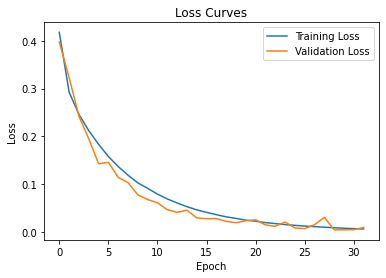

In [6]:
train_loss = train_history.history['loss']
train_loss_df = pd.DataFrame(train_loss)
#train_loss_df.to_csv(train_loss_path, index = False, header = False)

val_loss = train_history.history['val_loss']
val_loss_df = pd.DataFrame(val_loss)
#val_loss_df.to_csv(val_loss_path, index = False, header = False)

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [7]:
def plot_confusion_matrix(y_true, y_pred, title, path):
  labels = np.arange(15)
  cm = confusion_matrix(y_true, y_pred, labels)
  cm_df = pd.DataFrame(cm, columns = labels, index = labels)
  #cm_df.to_csv(path, index = True, header = True)
  cm_df.columns.name = 'Predicted'
  cm_df.index.name = 'Actual'
  sn.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'd')
  plt.title(title)
  plt.show()

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


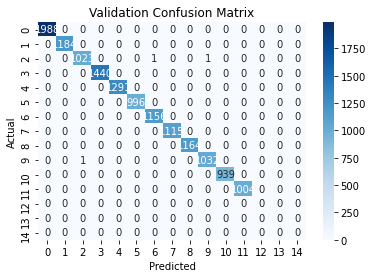

In [8]:
val_cm_path=r'Model Data/CNN Model/Raw/val_confusion_matrix_'+id_value+r'.csv'
plot_confusion_matrix(y_val, np.argmax(cnn_model.predict(X_val), axis = 1), 'Validation Confusion Matrix', val_cm_path)

Master data set shape is (7981, 951) 

 Master data set is
                                       150      151      152      153      154  \
gabbro0dust_test_015s_1020-0      1790.99  1806.70  1835.79  1836.75  1777.08   
gabbro0dust_test_015s_1020-1      1787.71  1799.74  1808.85  1792.39  1768.78   
gabbro0dust_test_015s_1020-2      2397.21  2414.80  2449.30  2435.91  2403.96   
gabbro0dust_test_015s_1020-3      2129.54  2124.58  2136.10  2145.48  2118.35   
gabbro0dust_test_015s_1020-4      1556.89  1580.30  1613.81  1605.28  1579.85   
...                                   ...      ...      ...      ...      ...   
granite0dust_test_015s_4839-4834  1242.31  1236.35  1230.02  1223.30  1214.36   
granite0dust_test_015s_4839-4835  1217.12  1215.47  1214.29  1214.05  1203.20   
granite0dust_test_015s_4839-4836  1232.02  1232.24  1228.86  1224.22  1214.24   
granite0dust_test_015s_4839-4837  1498.44  1496.02  1494.45  1493.29  1486.39   
granite0dust_test_015s_4839-4838  1287.51  1290.4

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


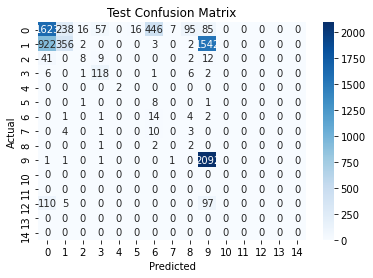

[[1.0133562e-02 2.8392462e-02 1.0105459e-02 ... 5.5321909e-02
  2.1056384e-03 1.5660875e-03]
 [1.1726331e-02 2.7427172e-02 1.3649760e-02 ... 1.3904237e-02
  1.4194614e-03 1.1313971e-03]
 [1.4906215e-02 1.2847963e-01 4.7595192e-02 ... 1.2647164e-01
  5.4750820e-03 4.3222788e-03]
 ...
 [9.9605489e-01 3.7342063e-04 2.6053900e-04 ... 2.9689606e-04
  3.1146326e-04 2.4586829e-04]
 [9.9470961e-01 4.6690085e-04 3.7580635e-04 ... 3.2802994e-04
  5.8199145e-04 3.5705839e-04]
 [9.9386358e-01 5.1113061e-04 1.1293574e-03 ... 4.2219643e-04
  6.4892584e-04 4.2118097e-04]]


In [9]:
testin_path=r'Data/Raw Data/Mixed/Test Set/'
test_cm_path=r'Model Data/CNN Model/Raw/test_confusion_matrix_'+id_value+r'.csv'

import helper as h
#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,split_df=False,dev_size=0.2,r_state=1,raw=True)


#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values


plot_confusion_matrix(y_test, np.argmax(cnn_model.predict(X_test), axis = 1), 'Test Confusion Matrix', test_cm_path) 
print(cnn_model.predict(X_test))

In [10]:
print(classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1)))

cr = classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1), output_dict = True)
cr_df = pd.DataFrame(cr).transpose()
#cr_df.to_csv(cr_path, index = True, header = True)

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.63      0.61      2583
           1       0.59      0.13      0.21      2827
           2       0.29      0.11      0.16        72
           3       0.63      0.88      0.73       134
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00        10
           6       0.03      0.64      0.06        22
           7       0.00      0.00      0.00        18
           8       0.02      0.40      0.03         5
           9       0.55      1.00      0.71      2096
          12       0.00      0.00      0.00       212

    accuracy                           0.53      7981
   macro avg       0.34      0.43      0.32      7981
weighted avg       0.56      0.53      0.47      7981

